## CUSTOMER SEGMENTATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# There are no null values.

In [7]:
# We can drop the cusomter id column since the values are unique.

In [8]:
df.drop('CustomerID',1,inplace = True)

#### EXPLORATORY DATA ANALYSIS

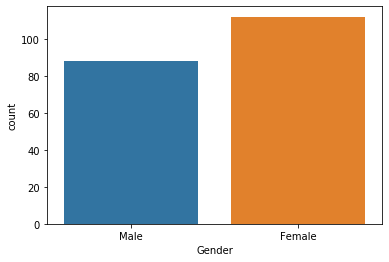

In [9]:
sns.countplot(data = df, x = 'Gender')

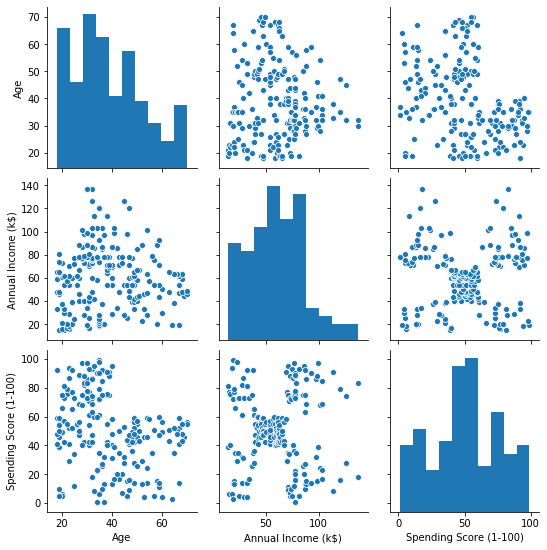

In [10]:
sns.pairplot(df)

In [11]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

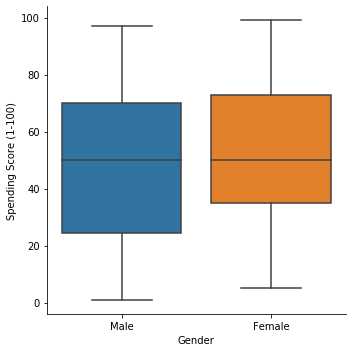

In [12]:
sns.catplot(x="Gender", y="Spending Score (1-100)", kind="box", data=df);

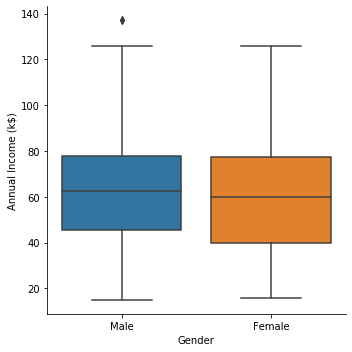

In [13]:
sns.catplot(x="Gender", y="Annual Income (k$)", kind="box", data=df)

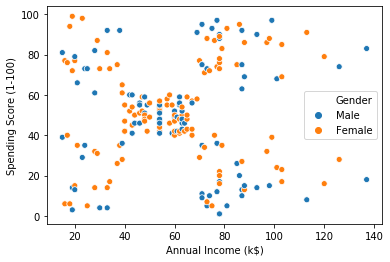

In [14]:
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue = 'Gender', data = df)

#### We can see that there is no correlation between annual income and spending score.

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [17]:
# Let us get the numerical features in a separate dataset for scaling

In [18]:
num = df.select_dtypes('int64')
cat = df.select_dtypes('object')

In [19]:
num.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
numsc = sc.fit_transform(num)  # scaling the numerical data

In [22]:
numsc = pd.DataFrame(numsc,columns = num.columns)

In [23]:
dummy = pd.get_dummies(df['Gender'])    # dummying the categorical features

In [24]:
dummy.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [25]:
df_new = pd.concat([numsc,dummy],1)           # concatenating the dummied dataframe and the scaled dataframe

In [26]:
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,-1.424569,-1.738999,-0.434801,0,1
1,-1.281035,-1.738999,1.195704,0,1
2,-1.352802,-1.700830,-1.715913,1,0
3,-1.137502,-1.700830,1.040418,1,0
4,-0.563369,-1.662660,-0.395980,1,0


### KMEANS

In [27]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10)
km.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
print(km.cluster_centers_)   # centroids
print(km.labels_)       # predicted

[[ 1.09830638e+00 -2.41583126e-01 -4.80790098e-02  1.00000000e+00
   0.00000000e+00]
 [-9.22201962e-01 -4.36467423e-01  5.04680289e-02 -2.22044605e-16
   1.00000000e+00]
 [-4.77931979e-01  9.72847870e-01  1.22158511e+00  1.00000000e+00
  -1.11022302e-16]
 [ 3.54219875e-01  1.24912183e+00 -1.14745442e+00  1.00000000e+00
  -1.11022302e-16]
 [-3.99899943e-01  1.01344075e+00  1.26040667e+00 -2.22044605e-16
   1.00000000e+00]
 [-7.92469869e-01 -1.49095663e-01 -9.28731183e-02  1.00000000e+00
   0.00000000e+00]
 [-2.70069385e-02  9.67012443e-01 -1.39716754e+00 -2.22044605e-16
   1.00000000e+00]
 [ 1.43505777e+00 -4.52983041e-01 -4.01952467e-01 -3.33066907e-16
   1.00000000e+00]
 [ 1.69676959e-01 -1.31640908e+00 -1.16686520e+00  9.28571429e-01
   7.14285714e-02]
 [-1.00473366e+00 -1.35921337e+00  1.19570407e+00  6.00000000e-01
   4.00000000e-01]]
[1 9 8 9 8 9 8 9 7 9 7 9 8 9 8 9 8 9 7 9 1 9 8 9 8 9 8 1 8 9 7 9 7 9 8 9 8
 9 8 9 0 9 7 5 8 5 0 5 5 5 0 1 5 7 0 7 0 7 5 7 7 1 0 0 7 1 0 0 1 5 7 0 0 0

In [29]:
km_pred = km.fit_predict(df_new)

In [30]:
km_error = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(df_new)
    km_error.append(km.inertia_)
print(km_error)

[698.56, 487.65863415711783, 393.5986115835212, 303.2874941784072, 264.9951861060046, 230.01400227551892, 210.93287769173148, 186.80764565097917, 168.02186230928976, 149.8938672891737, 137.69991159620088, 131.39494126329967, 117.89335123630237, 106.86301209232651, 100.09958168484422, 92.28642070439597, 86.24540678582031, 82.50171914376219, 78.5139075924355]


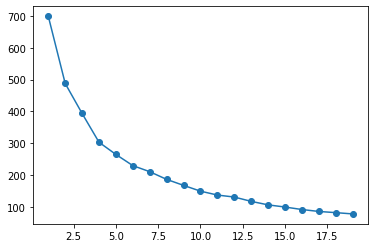

In [31]:
plt.plot(np.array(range(1,20)),np.array(km_error),'o-')

In [32]:
# From the graph we can infer that the optimum number of clusters is 5.

In [33]:
km = KMeans(n_clusters = 5)
km.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [34]:
print(km.cluster_centers_)   # centroids
print(km.labels_)       # predicted

[[-0.44191719  0.99158305  1.23950275  0.53846154  0.46153846]
 [ 0.17329545  1.06645385 -1.2980103   0.41176471  0.58823529]
 [ 1.23208028 -0.45078096 -0.31556383  0.55357143  0.44642857]
 [-0.68243598 -0.3744421  -0.27863293  0.75        0.25      ]
 [-1.02320693 -1.23007347  0.95270986  0.48148148  0.51851852]]
[4 4 3 4 3 4 3 4 2 4 2 4 2 4 3 4 3 4 2 4 3 4 2 4 2 4 2 4 3 4 2 4 2 4 2 4 3
 4 3 4 2 4 2 3 2 4 2 3 3 3 2 4 3 2 2 2 2 2 3 2 2 4 2 2 2 4 3 2 4 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 0 3 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [35]:
km_pred_1 = km.fit_predict(df_new)

### HIERARCHIAL

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram     # importing the neccesary libraries.
from scipy.cluster.hierarchy import linkage

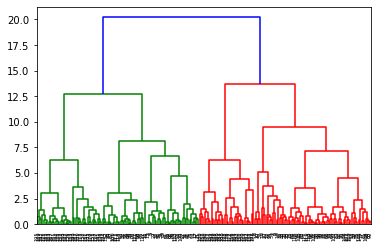

In [37]:
dendrogram(linkage(df_new,'ward'))
plt.show()

In [38]:
# Optimum number if clusters is 5.

In [39]:
ag = AgglomerativeClustering(n_clusters = 5)
ag.fit(df_new)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [40]:
ag_pred = ag.fit_predict(df_new)

In [41]:
kmeans = KMeans(n_clusters=5,init = 'k-means++',max_iter = 300, random_state=0)
y_kmeans = kmeans.fit_predict(df_new)

## CLUSTERING

In [42]:
pred = pd.DataFrame({'kmean_pred':km_pred_1,'ag_pred':ag_pred})

In [43]:
final = pd.concat([df,pred,dummy],1)

In [44]:
final.drop('Gender',1,inplace = True)

In [45]:
final.head()

,Age,Annual Income (k$),Spending Score (1-100),kmean_pred,ag_pred,Female,Male
0,19,15,39,2,4,0,1
1,21,15,81,2,0,0,1
2,20,16,6,4,4,1,0
3,23,16,77,2,0,1,0
4,31,17,40,4,4,1,0


In [46]:
final.kmean_pred.value_counts()

0    56
4    44
1    39
3    34
2    27
Name: kmean_pred, dtype: int64

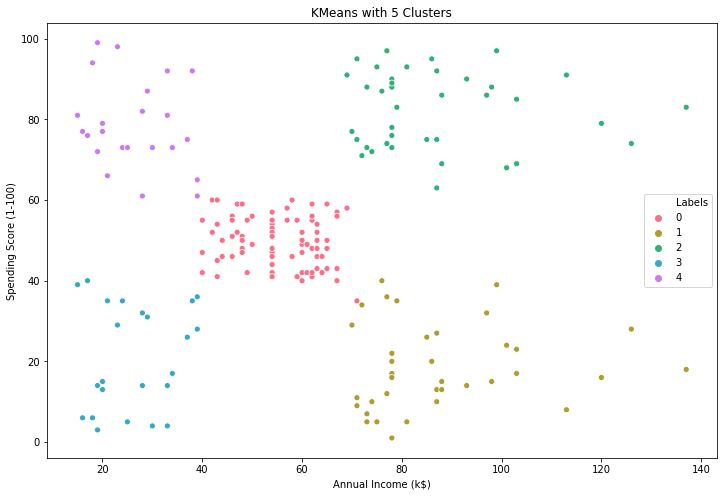

In [50]:
km3 = KMeans(n_clusters=5).fit(final)

final['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(final['Annual Income (k$)'], final['Spending Score (1-100)'], 
                hue=final['Labels'], palette=sns.color_palette('husl',5 ))
plt.title('KMeans with 5 Clusters')
plt.show()

### We have segmented the customers into 5 groups based on their annual income and spending score.